In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import einops
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import kurtosis, skew

2.1 MINST Data

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 475kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.45MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



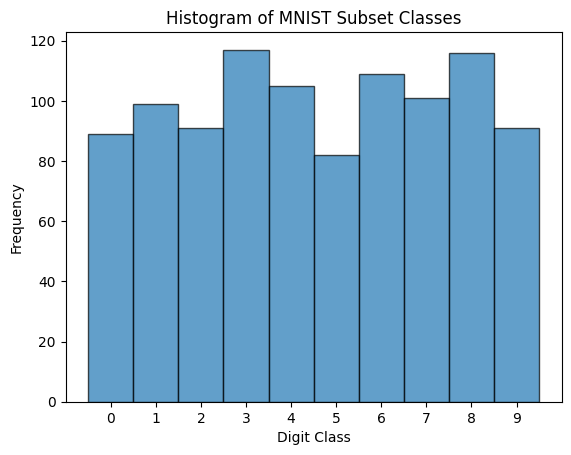

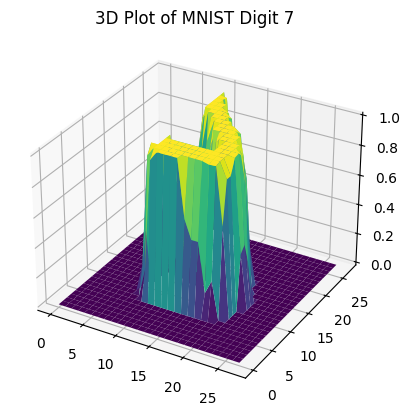

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
subset_indices = torch.randperm(len(mnist_data))[:1000]
mnist_subset = torch.utils.data.Subset(mnist_data, subset_indices)

# Extractingg labelsss and plotingg histogram
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]
plt.hist(labels, bins=np.arange(11)-0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(10))
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Subset Classes")
plt.show()

# Batchinggg usingg einops
images_tensor = torch.stack([img[0] for img in mnist_subset])  # Shape: [1000, 1, 28, 28]
num_batches = images_tensor.shape[0] // 25  # Calculatingg the number of batches explicitlyyy

batched_mnist = einops.rearrange(
    images_tensor,
    '(nb batch) c h w -> nb batch c h w',
    nb=num_batches
)

# Random MNIST image in 3D plotss
idx = np.random.randint(0, 1000)
img, label = mnist_subset[idx]
x, y = np.meshgrid(range(28), range(28))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, img.squeeze().numpy(), cmap='viridis')
plt.title(f"3D Plot of MNIST Digit {label}")
plt.show()

2.2 Time Series: Energy Data

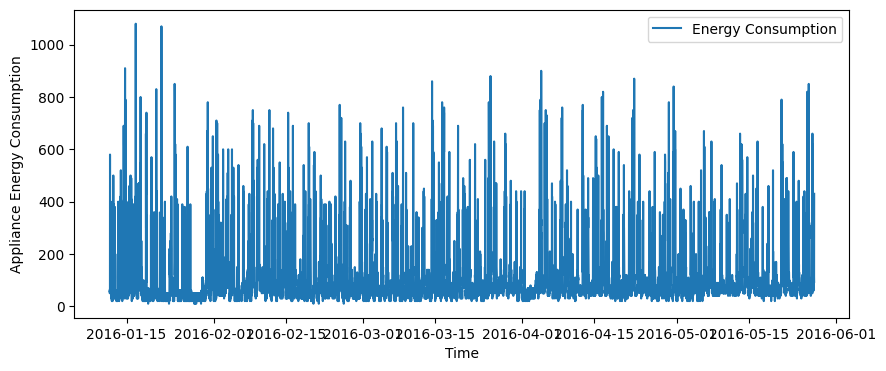

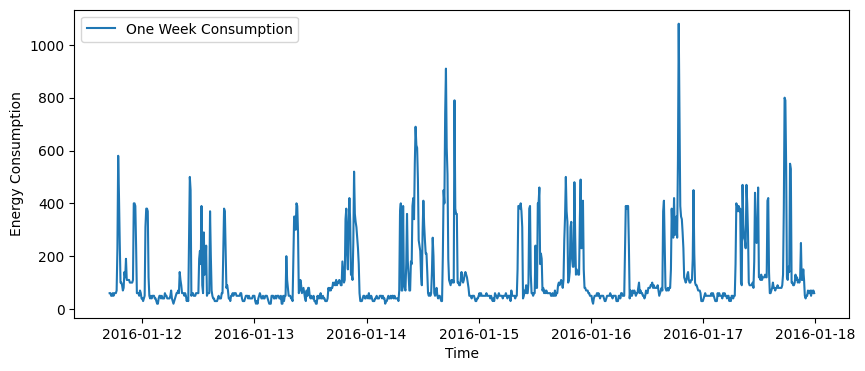

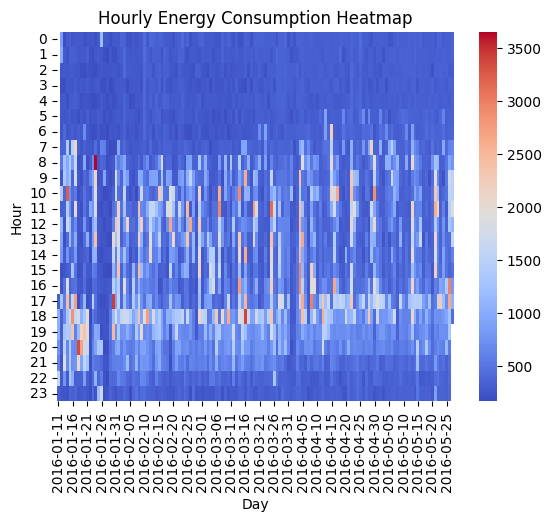

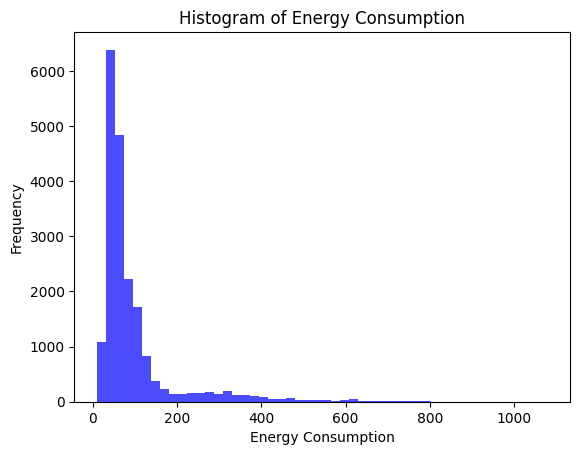

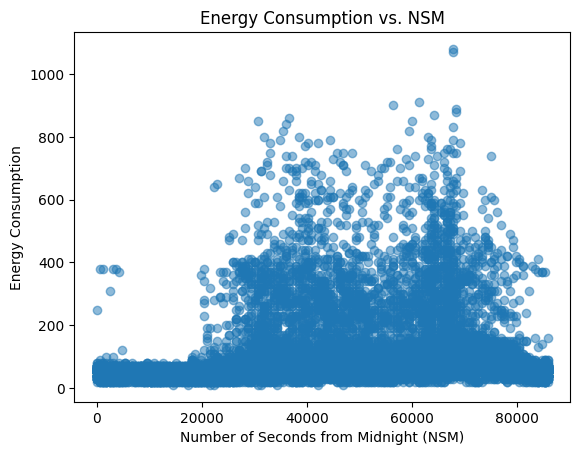

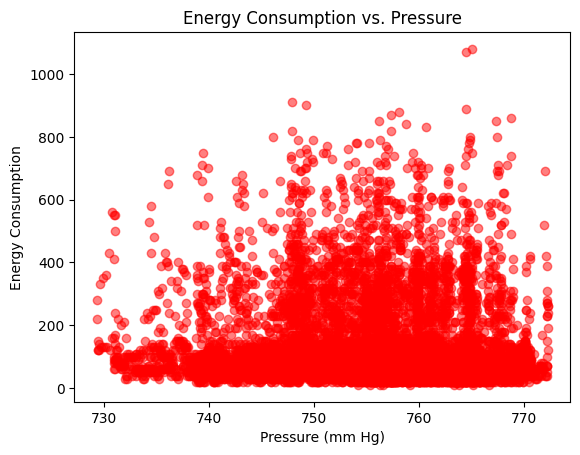

In [4]:
energy_data = pd.read_csv("energydata_complete.csv")
energy_data['date'] = pd.to_datetime(energy_data['date'])
energy_data.set_index('date', inplace=True)

# Plot energy consumption over time
plt.figure(figsize=(10, 4))
plt.plot(energy_data['Appliances'], label='Energy Consumption')
plt.xlabel("Time")
plt.ylabel("Appliance Energy Consumption")
plt.legend()
plt.show()

# One week consumption plot
one_week_data = energy_data.loc["2016-01-11":"2016-01-17"]
plt.figure(figsize=(10, 4))
plt.plot(one_week_data['Appliances'], label='One Week Consumption')
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.show()

# Heatmap of hourly consumption
hourly_data = energy_data['Appliances'].resample('h').sum()
hourly_data = hourly_data.to_frame()  # i am Converting the Series to DataFrame for compatibility
hourly_data['Hour'] = hourly_data.index.hour  # Extractingg parameter - hour of the day
hourly_data['Day'] = hourly_data.index.date  # Extractingg date

# Pivot to reshape for heatmap
hourly_pivot = hourly_data.pivot_table(index='Hour', columns='Day', values='Appliances')

sns.heatmap(hourly_pivot, cmap="coolwarm")
plt.title("Hourly Energy Consumption Heatmap")
plt.show()


# Histogram of energy consumption
plt.hist(energy_data['Appliances'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption")
plt.show()

# NSM Feature & Plot
energy_data['NSM'] = energy_data.index.hour * 3600 + energy_data.index.minute * 60
plt.scatter(energy_data['NSM'], energy_data['Appliances'], alpha=0.5)
plt.xlabel("Number of Seconds from Midnight (NSM)")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. NSM")
plt.show()

# Energy vs Pressure
plt.scatter(energy_data['Press_mm_hg'], energy_data['Appliances'], alpha=0.5, color='red')
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption vs. Pressure")
plt.show()

2.3 Multi-variate: Airfoil Data

                                  Mean  Standard Deviation       Median  \
Frequency                  2886.380572         3152.573137  1600.000000   
Angle of Attack               6.782302            5.918128     5.400000   
Chord Length                  0.136548            0.093541     0.101600   
Free-stream Velocity         50.860745           15.572784    39.600000   
Suction Side Displacement     0.011140            0.013150     0.004957   
Scaled Sound Pressure       124.835943            6.898657   125.721000   

                           Kurtosis  Skewness         Range  
Frequency                  5.685722  2.134951  19800.000000  
Angle of Attack           -0.415568  0.688476     22.200000  
Chord Length              -1.038504  0.457001      0.279400  
Free-stream Velocity      -1.562743  0.235617     39.600000  
Suction Side Displacement  2.207539  1.700465      0.058011  
Scaled Sound Pressure     -0.317132 -0.418534     37.607000  


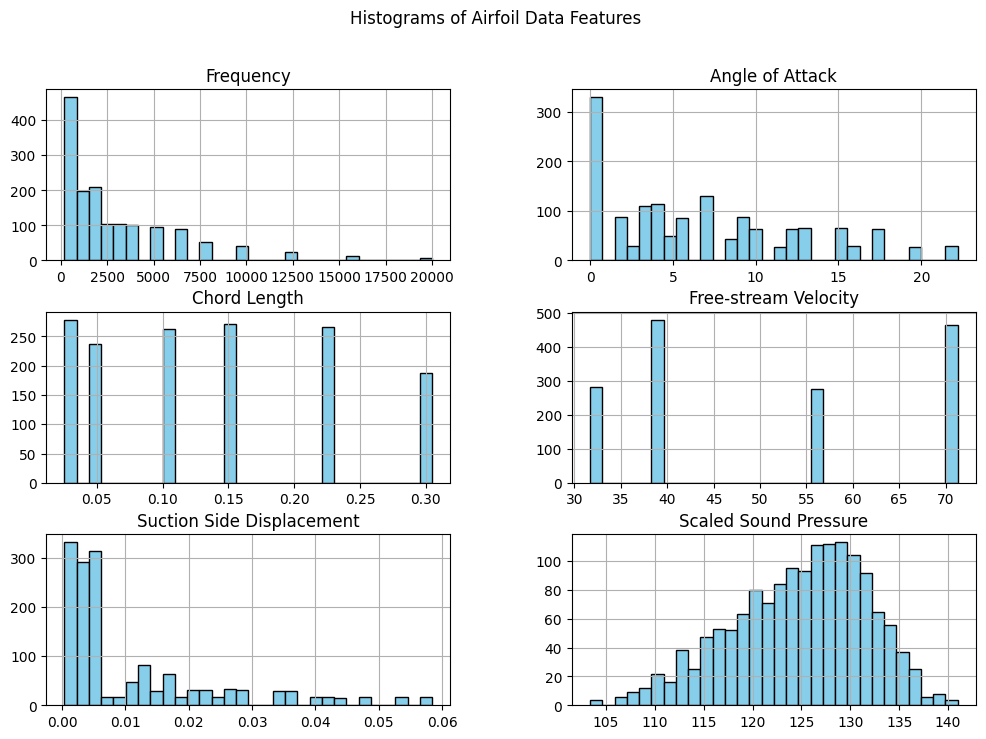

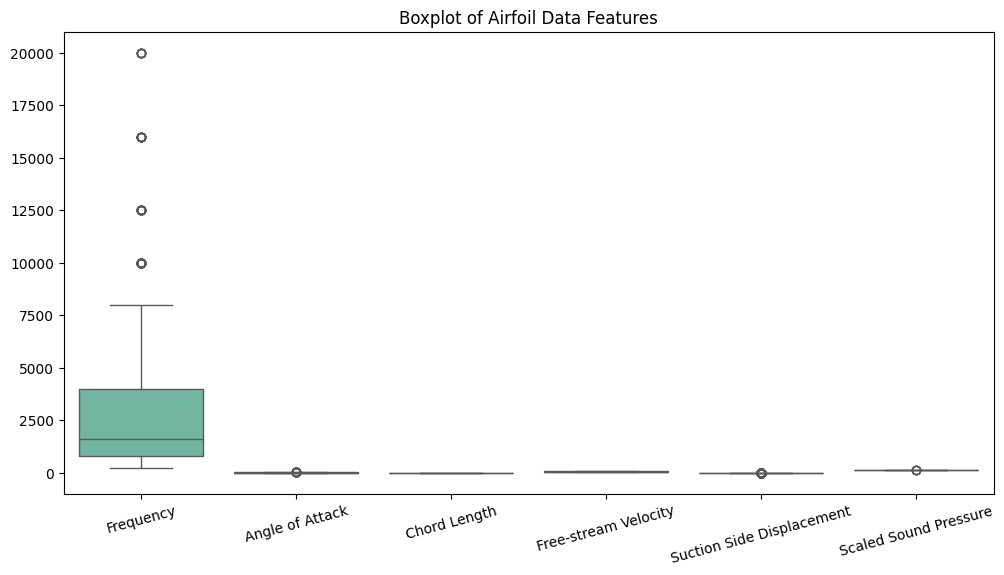

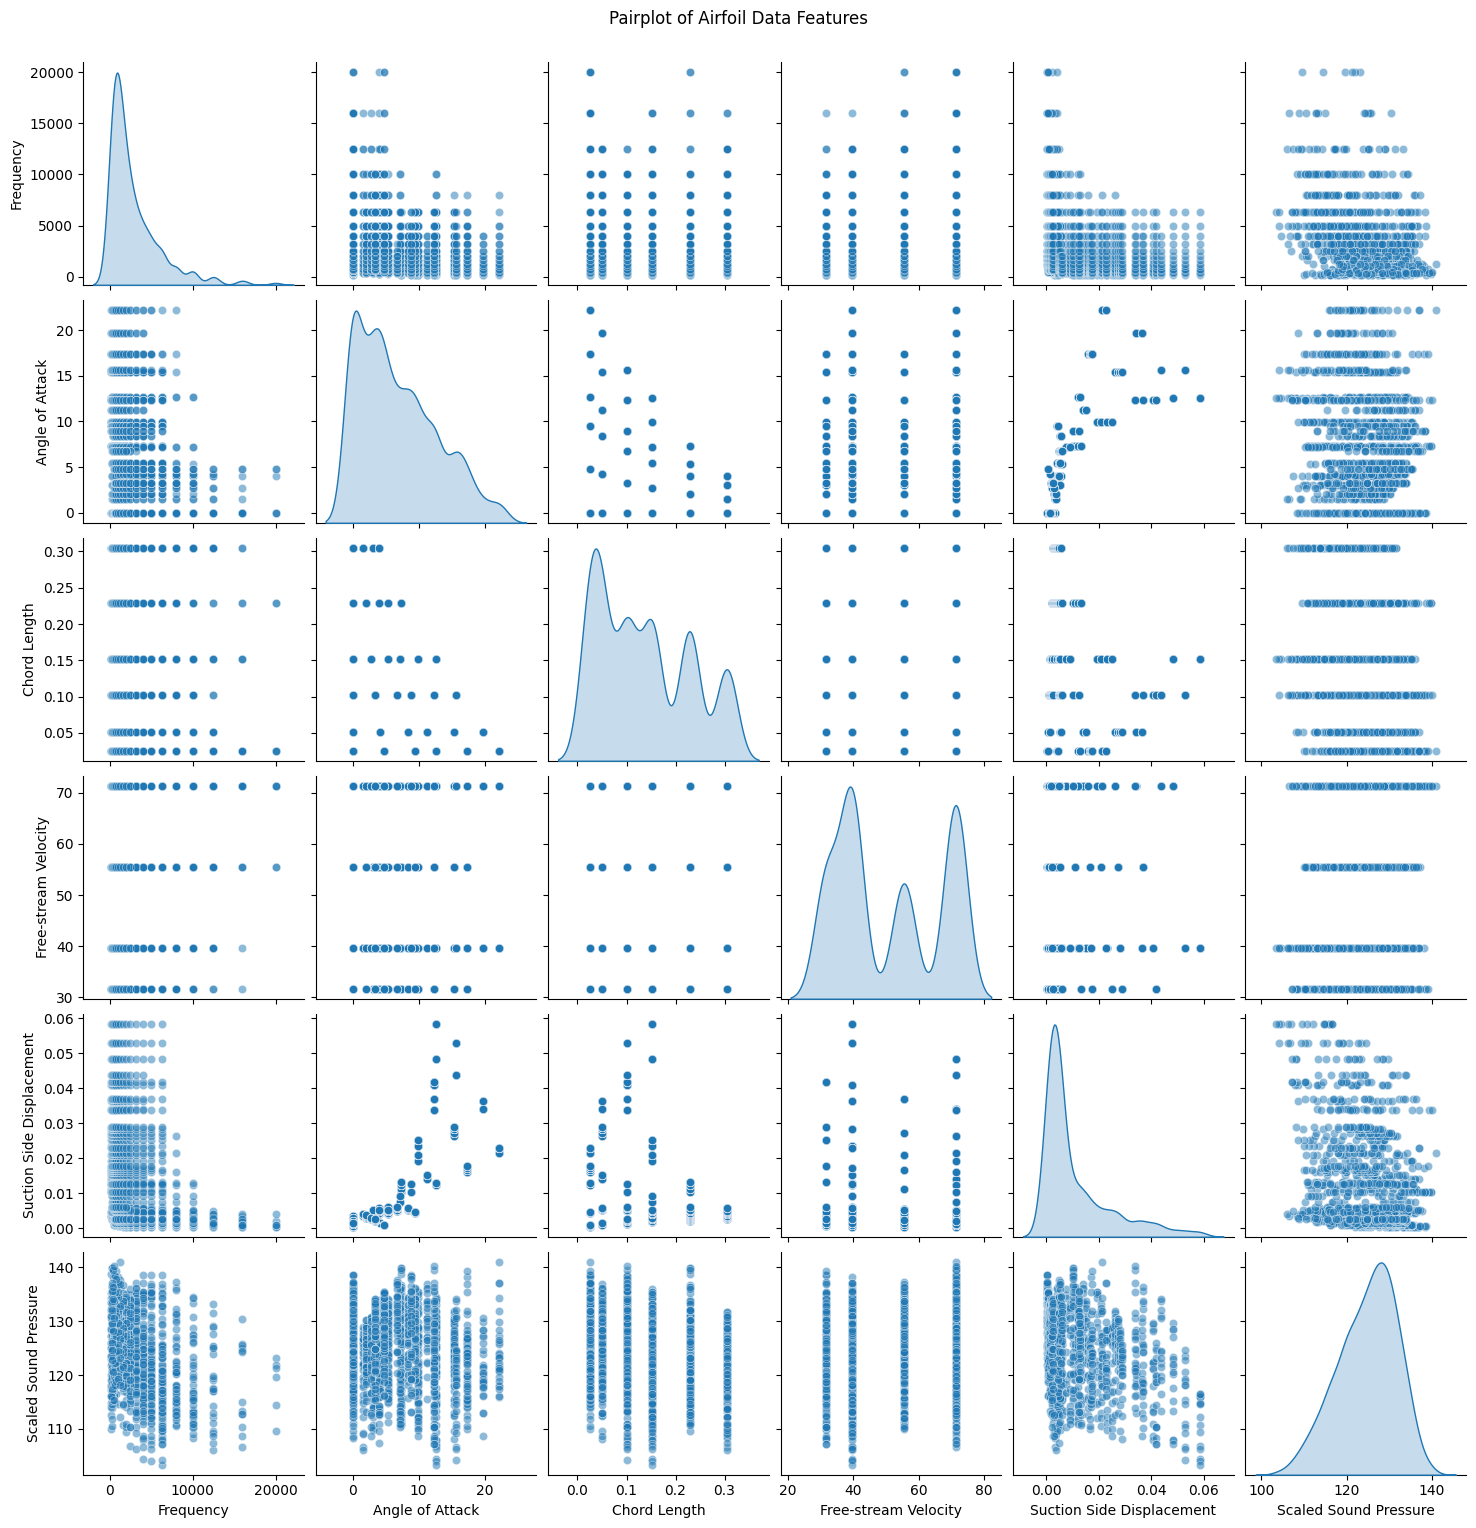

In [5]:
airfoil_data = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None)
airfoil_data.columns = ["Frequency", "Angle of Attack", "Chord Length", "Free-stream Velocity",
                        "Suction Side Displacement", "Scaled Sound Pressure"]

# Compute Descriptive Statistics
stats_df = pd.DataFrame({
    "Mean": airfoil_data.mean(),
    "Standard Deviation": airfoil_data.std(),
    "Median": airfoil_data.median(),
    "Kurtosis": airfoil_data.apply(kurtosis),
    "Skewness": airfoil_data.apply(skew),
    "Range": airfoil_data.max() - airfoil_data.min()
})

print(stats_df)

# Histograms for Feature Distributions
airfoil_data.hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Airfoil Data Features")
plt.show()

# Boxplots for Outliers and Variance
plt.figure(figsize=(12, 6))
sns.boxplot(data=airfoil_data, palette="Set2")
plt.xticks(rotation=15)
plt.title("Boxplot of Airfoil Data Features")
plt.show()

# Pairplot to Show Feature Relationships
sns.pairplot(airfoil_data, diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Airfoil Data Features", y=1.02)
plt.show()